# Identify Sentiments

## Load the Dataset 

In [2]:
# we need pandas library to read csv file
import pandas as pd
train_set = pd.read_csv("train_2kmZucJ.csv")

In [3]:
train_set.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing 

In [4]:
train_set.shape

(7920, 3)

In [5]:
train_set.duplicated().sum()

0

In [6]:
train_set.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
train_set["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

- There are no any null values
- There are no any duplicate values

In [8]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# convert uppercase to lowercase
train_set["tweet"] = train_set["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# delete links marks
train_set["tweet"] = train_set['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

# delete punctuation marks
train_set["tweet"] = train_set["tweet"].str.replace('[^\w\s]','')

# delete numbers
train_set['tweet'] = train_set['tweet'].str.replace('\d','')

# remove stopwords
sw = stopwords.words("english")
train_set['tweet'] = train_set['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

# lemmatization
lemmatizer = WordNetLemmatizer()
train_set['tweet'] = train_set['tweet'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

C:\Users\Deep Blade\AppData\Local\Temp\ipykernel_7208\526360824.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  train_set["tweet"] = train_set["tweet"].str.replace('[^\w\s]','')
C:\Users\Deep Blade\AppData\Local\Temp\ipykernel_7208\526360824.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  train_set['tweet'] = train_set['tweet'].str.replace('\d','')


In [9]:
train_set.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...


## Building a Vocabulary 

In [10]:
from collections import Counter
vocab = Counter()

In [11]:
for sentence in train_set['tweet']:
    vocab.update(sentence.split())

In [12]:
len(vocab)

16645

In [13]:
tokens = [key for key in vocab if vocab[key] > 10]

In [14]:
len(tokens)

1126

In [15]:
tokens

['android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone',
 'finally',
 'case',
 'thanks',
 'yay',
 'sony',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphone',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amazing',
 'service',
 'apple',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'software',
 'update',
 'fucked',
 'phone',
 'big',
 'time',
 'iphones',
 'happy',
 'u',
 'instapic',
 'instadaily',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cable',
 'uk',
 'amazon',
 'year',
 'newyear',
 'starting',
 'technology',
 'samsunggalaxys',
 'iphonex',
 'shopping',
 'listening',
 'music',
 'likeforlike',
 'photo',
 'fun',
 'selfie',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'every',
 'need',
 'really',
 'dropped',
 'ball',
 'design',
 'giving',
 'another',
 'crazy',
 'purchase',
 'lol',
 'work',
 'har

In [16]:
def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_list(tokens, 'vocabulary.txt')

## Divide Dataset 

In [17]:
X = train_set['tweet']
y = train_set['label']

In [18]:
X.shape

(7920,)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape, X_test.shape

((6336,), (1584,))

In [21]:
X_train.head(5)

1643    available hoodie check iphone case music discount
3637    tdrewk coming tech enthusiast iphone droid p c...
4752          much iphone rt lairosiel new blog post miau
744     havent tried instagram yet here reason give wh...
1917    mean error restoring ipod thus losing old musi...
Name: tweet, dtype: object

In [22]:
import numpy as np
vectorized_train_lst = []
for sentence in X_train:
    sentence_lst = np.zeros(len(tokens))
    for i in range(len(tokens)):
        if tokens[i] in sentence.split():
            sentence_lst[i] = 1
    vectorized_train_lst.append(sentence_lst)
X_train_new = np.asarray(vectorized_train_lst, dtype=np.float32)

In [23]:
X_train_new[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
vectorized_test_lst = []
for sentence in X_test:
    sentence_lst = np.zeros(len(tokens))
    for i in range(len(tokens)):
        if tokens[i] in sentence.split():
            sentence_lst[i] = 1
    vectorized_test_lst.append(sentence_lst)
X_test_new = np.asarray(vectorized_test_lst, dtype=np.float32)

In [25]:
X_train_new.shape

(6336, 1126)

In [26]:
X_test_new.shape

(1584, 1126)

## Handle Imbalanced dataset 

In [27]:
y_train.value_counts()

0    4729
1    1607
Name: label, dtype: int64

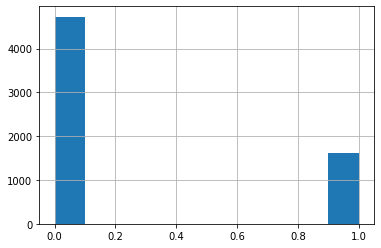

In [28]:
from matplotlib import pyplot as plt
y_train.hist()
plt.show()

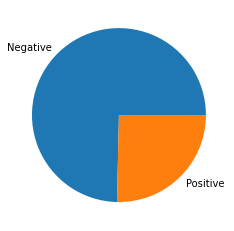

In [29]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Negative', 'Positive'])
plt.show()

In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_new, y_train)
print(X_train_smote.shape, y_train_smote.shape)

(9458, 1126) (9458,)


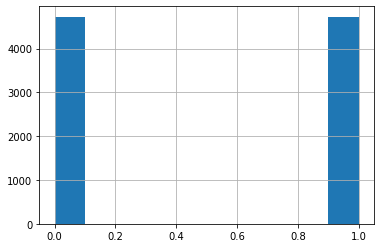

In [31]:
y_train_smote.hist()
plt.show()

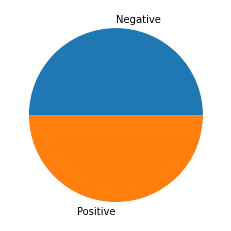

In [32]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Negative', 'Positive'])
plt.show()

## Trainning and evaluation the model 

In [33]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Functions to print scores
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [35]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)

lr_y_train_pred = lr.predict(X_train_smote)

lr_y_test_pred = lr.predict(X_test_new)

training_scores(y_train_smote, lr_y_train_pred)
validation_scores(y_test, lr_y_test_pred)

Training Scores:
	Accuracy = 0.936
	Precision = 0.908
	Recall = 0.969
	F1-Score = 0.938
Testing Scores:
	Accuracy = 0.886
	Precision = 0.747
	Recall = 0.862
	F1-Score = 0.8


In [36]:
# Naive Bayes Classifier
mnb = MultinomialNB()
mnb.fit(X_train_smote, y_train_smote)

mnb_y_train_pred = mnb.predict(X_train_smote)

mnb_y_test_pred = mnb.predict(X_test_new)

training_scores(y_train_smote, mnb_y_train_pred)
validation_scores(y_test, mnb_y_test_pred)

Training Scores:
	Accuracy = 0.9
	Precision = 0.862
	Recall = 0.953
	F1-Score = 0.905
Testing Scores:
	Accuracy = 0.881
	Precision = 0.711
	Recall = 0.926
	F1-Score = 0.804


In [37]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)

rf_y_train_pred = rf.predict(X_train_smote)

rf_y_test_pred = rf.predict(X_test_new)

training_scores(y_train_smote, rf_y_train_pred)
validation_scores(y_test, rf_y_test_pred)

Training Scores:
	Accuracy = 0.999
	Precision = 1.0
	Recall = 0.999
	F1-Score = 0.999
Testing Scores:
	Accuracy = 0.862
	Precision = 0.768
	Recall = 0.687
	F1-Score = 0.725


In [38]:
# Extreme Gradient Boosting Classifier
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss')
xgb.fit(X_train_smote, y_train_smote)

xgb_y_train_pred = xgb.predict(X_train_smote)

xgb_y_test_pred = xgb.predict(X_test_new)

training_scores(y_train_smote, xgb_y_train_pred)
validation_scores(y_test, xgb_y_test_pred)

Training Scores:
	Accuracy = 0.938
	Precision = 0.924
	Recall = 0.955
	F1-Score = 0.939
Testing Scores:
	Accuracy = 0.883
	Precision = 0.769
	Recall = 0.795
	F1-Score = 0.782


In [39]:
# Support Vector Classifier
svm = SVC()
svm.fit(X_train_smote, y_train_smote)

svm_y_train_pred = svm.predict(X_train_smote)

svm_y_test_pred = svm.predict(X_test_new)

training_scores(y_train_smote, svm_y_train_pred)
validation_scores(y_test, svm_y_test_pred)

Training Scores:
	Accuracy = 0.974
	Precision = 0.955
	Recall = 0.995
	F1-Score = 0.975
Testing Scores:
	Accuracy = 0.888
	Precision = 0.773
	Recall = 0.819
	F1-Score = 0.795


## Hyperparameter Optimization 

In [42]:
from sklearn.model_selection import GridSearchCV

# define different values for hyper-parameters
param_grid = {
    'max_depth': [10, 20, 30, 40, 50],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000]}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_smote,y_train_smote)

KeyboardInterrupt: 

In [39]:
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(rf, files)